In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error 
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("./hanoi_house_processing_1.csv")

In [3]:
df

,price,location,size,Price_per_m2,bedroom,toi_list,mat_tien,floor,duong_vao,phap_ly,noi_that,Huong,Huong_ban_cong
0,7.30,5,60.0,121.67,3.0,4.0,5.000000,5.0,4.9,2,1,8,6
1,4.50,5,35.0,128.57,3.0,4.0,4.000000,5.0,4.9,2,3,8,6
2,8.65,19,46.0,188.04,4.0,4.0,4.504429,4.0,4.9,2,3,8,6
3,4.85,16,46.0,105.44,4.0,3.0,4.700000,5.0,4.9,2,4,8,6
4,4.50,16,36.0,125.00,4.0,4.0,4.504429,5.0,10.0,2,4,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,5.15,10,78.0,66.03,3.0,3.0,4.500000,2.0,4.5,2,4,8,6
2359,9.00,8,68.0,132.35,3.0,2.0,5.000000,5.0,8.0,2,4,8,6
2360,3.50,16,30.0,116.67,4.0,6.0,4.504429,5.0,4.9,2,3,8,6
2361,5.68,10,50.0,113.60,3.0,3.0,5.000000,5.0,4.9,2,4,8,6


In [4]:
y=df['price']
X=df.drop(['price'], axis = 1)
X

,location,size,Price_per_m2,bedroom,toi_list,mat_tien,floor,duong_vao,phap_ly,noi_that,Huong,Huong_ban_cong
0,5,60.0,121.67,3.0,4.0,5.000000,5.0,4.9,2,1,8,6
1,5,35.0,128.57,3.0,4.0,4.000000,5.0,4.9,2,3,8,6
2,19,46.0,188.04,4.0,4.0,4.504429,4.0,4.9,2,3,8,6
3,16,46.0,105.44,4.0,3.0,4.700000,5.0,4.9,2,4,8,6
4,16,36.0,125.00,4.0,4.0,4.504429,5.0,10.0,2,4,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2358,10,78.0,66.03,3.0,3.0,4.500000,2.0,4.5,2,4,8,6
2359,8,68.0,132.35,3.0,2.0,5.000000,5.0,8.0,2,4,8,6
2360,16,30.0,116.67,4.0,6.0,4.504429,5.0,4.9,2,3,8,6
2361,10,50.0,113.60,3.0,3.0,5.000000,5.0,4.9,2,4,8,6


## Spliting Data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [6]:
reg = LinearRegression().fit(X_train, y_train)

In [7]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

In [8]:
r2_score(y_test, y_test_pred)

0.7416546287843427

In [9]:
print("Absolute Error", mean_absolute_error(y_test,y_test_pred))
print("Squared Error", mean_squared_error(y_test, y_test_pred)**(0.5))

Absolute Error 1.0793656808808927
Squared Error 1.7399434272644283


### Support Vector Regression

In [10]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [11]:
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)

SVR(kernel='linear')

In [12]:
y_train_svm_pred = svr_model.predict(X_train)
y_test_svm_pred = svr_model.predict(X_test)

In [13]:
r2_score(y_test, y_test_svm_pred)

0.7280064071500552

In [14]:
print("Absolute Error", mean_absolute_error(y_test,y_test_svm_pred))
print("Squared Error", mean_squared_error(y_test, y_test_svm_pred)**(0.5))

Absolute Error 0.9537033433232448
Squared Error 1.7853119928425283


### Random Forest

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [17]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
            
     

In [18]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)


In [19]:
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [20]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

In [21]:
model_final = rf_random.best_estimator_

In [22]:
model_final.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 80,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [23]:
y_train_rf_pred = model_final.predict(X_train)
y_test_rf_pred = model_final.predict(X_test)

In [24]:
r2_score(y_test, y_test_rf_pred)

0.8939103644101356

In [25]:
print("Absolute Error", mean_absolute_error(y_test,y_test_rf_pred))
print("Squared Error", mean_squared_error(y_test, y_test_rf_pred)**(0.5))

Absolute Error 0.5813673814557688
Squared Error 1.1149907495162854


In [26]:
import pickle
pickle.dump(model_final,open('./model/model_rf.pickle',mode='wb'))

In [27]:
pickle.dump(svr_model,open('./model/svr_model.pickle',mode='wb'))
pickle.dump(reg,open('./model/model_Linear.pickle',mode='wb'))

### Decision Tree

In [28]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV

In [29]:
param_grid = {'max_depth': [5, 10, None], 'max_features': ['auto', 'log2', 'sqrt'], 'min_samples_leaf': [5, 6, 7, 9,11, 12, 13, 15]}
reg_decision_model = DecisionTreeRegressor(random_state = 42) 

In [30]:
reg_decision_model.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [31]:
regressor = GridSearchCV(reg_decision_model,param_grid=param_grid,scoring='neg_mean_absolute_error',cv=3,verbose=3)
regressor.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=5;, score=-1.236 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=5;, score=-1.178 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=5;, score=-1.238 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=6;, score=-1.251 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=6;, score=-1.176 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=6;, score=-1.242 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=7;, score=-1.280 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=7;, score=-1.190 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=7;, score=-1.242 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples

C:\Users\assas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\assas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\assas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\assas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\assas\a

[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=9;, score=-1.257 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=11;, score=-1.294 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=11;, score=-1.214 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=11;, score=-1.176 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=12;, score=-1.291 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=12;, score=-1.220 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=12;, score=-1.188 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=auto, min_samples_leaf=13;, score=-1.295 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, min_samples_leaf=13;, score=-1.222 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, min_samples_leaf=13;, score=-1.196 total time=   0.0s
[CV 1/3] EN

C:\Users\assas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\assas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\assas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\assas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\assas\a

[CV 1/3] END max_depth=5, max_features=log2, min_samples_leaf=9;, score=-1.555 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, min_samples_leaf=9;, score=-1.581 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, min_samples_leaf=9;, score=-1.520 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, min_samples_leaf=11;, score=-1.779 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, min_samples_leaf=11;, score=-1.546 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, min_samples_leaf=11;, score=-1.529 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, min_samples_leaf=12;, score=-1.758 total time=   0.0s
[CV 2/3] END max_depth=5, max_features=log2, min_samples_leaf=12;, score=-1.546 total time=   0.0s
[CV 3/3] END max_depth=5, max_features=log2, min_samples_leaf=12;, score=-1.567 total time=   0.0s
[CV 1/3] END max_depth=5, max_features=log2, min_samples_leaf=13;, score=-1.758 total time=   0.0s
[CV 2/3] END 

C:\Users\assas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\assas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\assas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\assas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\assas\a

[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=7;, score=-1.048 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=7;, score=-1.095 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=9;, score=-1.124 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=9;, score=-1.081 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=9;, score=-1.088 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=11;, score=-1.185 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=11;, score=-1.079 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=auto, min_samples_leaf=11;, score=-1.039 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=auto, min_samples_leaf=12;, score=-1.180 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=auto, min_samples_leaf=12;, score=-1.086 total time=   0.0s
[CV 3

C:\Users\assas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\assas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\assas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\assas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\assas\a

[CV 1/3] END max_depth=10, max_features=log2, min_samples_leaf=5;, score=-1.433 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, min_samples_leaf=5;, score=-1.557 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, min_samples_leaf=5;, score=-1.313 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, min_samples_leaf=6;, score=-1.507 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, min_samples_leaf=6;, score=-1.517 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, min_samples_leaf=6;, score=-1.487 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, min_samples_leaf=7;, score=-1.397 total time=   0.0s
[CV 2/3] END max_depth=10, max_features=log2, min_samples_leaf=7;, score=-1.534 total time=   0.0s
[CV 3/3] END max_depth=10, max_features=log2, min_samples_leaf=7;, score=-1.469 total time=   0.0s
[CV 1/3] END max_depth=10, max_features=log2, min_samples_leaf=9;, score=-1.517 total time=   0.0s
[CV 2/3] E

C:\Users\assas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\assas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\assas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\assas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\assas\a

[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=5;, score=-1.060 total time=   0.0s
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=5;, score=-1.057 total time=   0.0s
[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=5;, score=-1.078 total time=   0.0s
[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=6;, score=-1.113 total time=   0.0s
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=6;, score=-1.038 total time=   0.0s
[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=6;, score=-1.071 total time=   0.0s
[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=7;, score=-1.139 total time=   0.0s
[CV 2/3] END max_depth=None, max_features=auto, min_samples_leaf=7;, score=-1.041 total time=   0.0s
[CV 3/3] END max_depth=None, max_features=auto, min_samples_leaf=7;, score=-1.101 total time=   0.0s
[CV 1/3] END max_depth=None, max_features=auto, min_samples_leaf=9;, score=-1.135 total tim

C:\Users\assas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\assas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\assas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\assas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\assas\a

[CV 1/3] END max_depth=None, max_features=log2, min_samples_leaf=11;, score=-1.382 total time=   0.0s
[CV 2/3] END max_depth=None, max_features=log2, min_samples_leaf=11;, score=-1.435 total time=   0.0s
[CV 3/3] END max_depth=None, max_features=log2, min_samples_leaf=11;, score=-1.423 total time=   0.0s
[CV 1/3] END max_depth=None, max_features=log2, min_samples_leaf=12;, score=-1.606 total time=   0.0s
[CV 2/3] END max_depth=None, max_features=log2, min_samples_leaf=12;, score=-1.554 total time=   0.0s
[CV 3/3] END max_depth=None, max_features=log2, min_samples_leaf=12;, score=-1.391 total time=   0.0s
[CV 1/3] END max_depth=None, max_features=log2, min_samples_leaf=13;, score=-1.489 total time=   0.0s
[CV 2/3] END max_depth=None, max_features=log2, min_samples_leaf=13;, score=-1.566 total time=   0.0s
[CV 3/3] END max_depth=None, max_features=log2, min_samples_leaf=13;, score=-1.391 total time=   0.0s
[CV 1/3] END max_depth=None, max_features=log2, min_samples_leaf=15;, score=-1.555

C:\Users\assas\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_leaf': [5, 6, 7, 9, 11, 12, 13, 15]},
             scoring='neg_mean_absolute_error', verbose=3)

In [32]:
regressor.best_params_

{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 5}

In [33]:
model_dt_final = regressor.best_estimator_

In [34]:

y_train_dt_pred = model_dt_final.predict(X_train)
y_test_dt_pred = model_dt_final.predict(X_test)

In [35]:
r2_score(y_test, y_test_dt_pred)

0.7226336840247494

In [36]:
print("Absolute Error", mean_absolute_error(y_test,y_test_dt_pred))
print("Squared Error", mean_squared_error(y_test, y_test_dt_pred)**(0.5))

Absolute Error 0.980452842377261
Squared Error 1.802858511380197


In [37]:
pickle.dump(model_dt_final,open('./model/model_dt.pickle',mode='wb'))

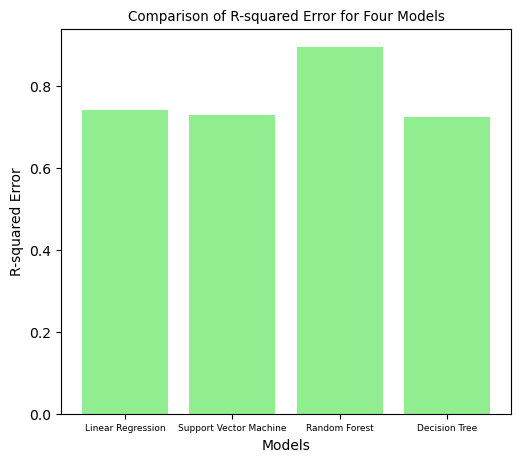

In [31]:
import matplotlib.pyplot as plt

# R-squared values for your four models
model_names = ["Linear Regression", "Support Vector Machine", "Random Forest", "Decision Tree"]
r_squared_values = [0.7416546287843427, 0.7280064071500552, 0.8939103644101356, 0.7226336840247494]

# Create a bar chart
fig, ax = plt.subplots(figsize=(5.8, 5))
plt.bar(model_names, r_squared_values, color = 'lightgreen')
plt.xlabel("Models")
plt.xticks(fontsize = 6.5)
plt.ylabel("R-squared Error")
plt.title("Comparison of R-squared Error for Four Models", fontsize = 9.7)

# Show the chart
plt.show()

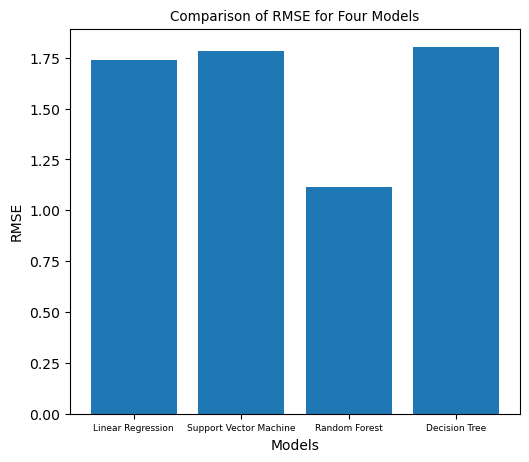

In [25]:
import matplotlib.pyplot as plt

# R-squared values for your four models
model_names = ["Linear Regression", "Support Vector Machine", "Random Forest", "Decision Tree"]
r_squared_values = [1.7399434272644283, 1.7853119928425283, 1.1149907495162854, 1.802858511380197]

# Create a bar chart
fig, ax = plt.subplots(figsize=(5.8, 5))  # Correct the "figuresize" to "fig, ax = plt.subplots()"
plt.bar(model_names, r_squared_values)
plt.xlabel("Models")
plt.xticks(fontsize=6.5)
plt.ylabel("RMSE")
plt.title("Comparison of RMSE for Four Models", fontsize=9.7)

# Show the chart
plt.show()

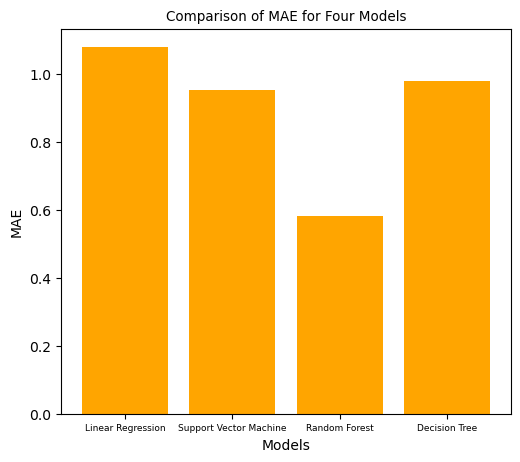

In [32]:
import matplotlib.pyplot as plt

# R-squared values for your four models
model_names = ["Linear Regression", "Support Vector Machine", "Random Forest", "Decision Tree"]
r_squared_values = [1.0793656808808927, 0.9537033433232448, 0.5813673814557688, 0.980452842377261]

# Create a bar chart
fig, ax = plt.subplots(figsize=(5.8, 5))  # Correct the "figuresize" to "fig, ax = plt.subplots()"
plt.bar(model_names, r_squared_values, color = 'orange')
plt.xlabel("Models")
plt.xticks(fontsize=6.5)
plt.ylabel("MAE")
plt.title("Comparison of MAE for Four Models", fontsize=9.7)

# Show the chart
plt.show()

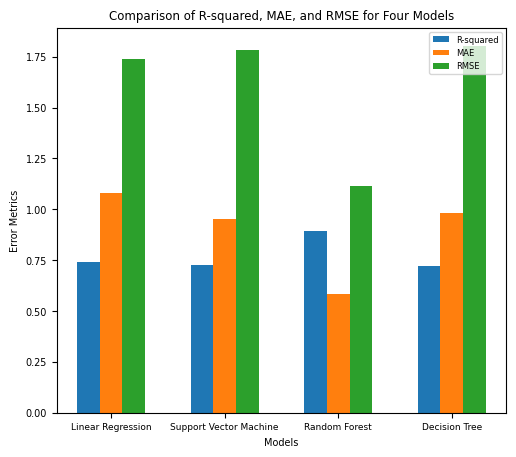

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and error metrics for R-squared, MAE, and RMSE
model_names = ["Linear Regression", "Support Vector Machine", "Random Forest", "Decision Tree"]
r_squared =  [0.7416546287843427, 0.7280064071500552, 0.8939103644101356, 0.7226336840247494]
mae =[1.0793656808808927, 0.9537033433232448, 0.5813673814557688, 0.980452842377261]
rmse = [1.7399434272644283, 1.7853119928425283, 1.1149907495162854, 1.802858511380197]


# Set the width of each bar and the x-axis locations
bar_width = 0.2
x = np.arange(len(model_names))

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(5.8, 5))

# Position the bars for R-squared, MAE, and RMSE
bar1 = ax.bar(x - bar_width, r_squared, bar_width, label='R-squared')
bar2 = ax.bar(x, mae, bar_width, label='MAE')
bar3 = ax.bar(x + bar_width, rmse, bar_width, label='RMSE')

# Label the x-axis with model names
ax.set_xticks(x)
ax.set_xticklabels(model_names)

# Add labels and a legend
ax.set_xlabel("Models", fontsize= 7)
plt.xticks(fontsize=6.5)
ax.set_ylabel("Error Metrics",fontsize= 7 )
plt.yticks(fontsize=7)
ax.set_title("Comparison of R-squared, MAE, and RMSE for Four Models", fontsize=8.5 )
ax.legend(fontsize= 6)

# Show the chart
plt.show()


-----
**END**